In [28]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [29]:
#Simple loop to have user select which version to run
while True:
    select = input("Please enter 'relu' or 'sigmoid' or 'combo' for RELU or Sigmoid or Combo of both respectively \n")
    if select in ["relu", "sigmoid", "combo"]:
        print("Running %s" % select)
        break

Running combo


In [30]:
def feed_forward(features, w1, b1, w2, b2, w3, b3, select):
    #my Sigmoid functions
    def sigmoid(x):
        return 1/(1+np.exp(-x))

    #my RELU function
    def relu(x):
        return np.maximum(x, 0)

    #run Relu, Sigmoid, or Combo depending on the user input
    #activation function gets ran on every layer
    if select == "sigmoid":
        #sigmoid
        #hidden layer 1
        hl1 = (np.matmul(w1, features))
        hl1_bias = np.add(hl1, b1)
        hl1_act = sigmoid(hl1_bias)
        #hidden layer 2
        hl2 = (np.matmul(w2, hl1_act))
        hl2_bias = np.add(hl2, b2)
        hl2_act = sigmoid(hl2_bias)
        #output layer
        output = (np.matmul(w3, hl2_act))
        targets_predicted = np.add(output, b3)
        targets_predicted = sigmoid(targets_predicted)
    elif select == "relu":
        #relu
        #hidden layer 1
        hl1 = (np.matmul(w1, features))
        hl1_bias = np.add(hl1, b1)
        hl1_act = relu(hl1_bias)
        #hidden layer 2
        hl2 = (np.matmul(w2, hl1_act))
        hl2_bias = np.add(hl2, b2)
        hl2_act = relu(hl2_bias)
        #output layer
        output = (np.matmul(w3, hl2_act))
        targets_predicted = np.add(output, b3)
        targets_predicted = relu(targets_predicted)
    else: #combo function
        #relu
        #hidden layer 1
        hl1 = (np.matmul(w1, features))
        hl1_bias = np.add(hl1, b1)
        hl1_act = relu(hl1_bias)
        #relu
        #hidden layer 2
        hl2 = (np.matmul(w2, hl1_act))
        hl2_bias = np.add(hl2, b2)
        hl2_act = relu(hl2_bias)
        #sigmoid
        #output layer
        output = (np.matmul(w3, hl2_act))
        targets_predicted = np.add(output, b3)
        targets_predicted = sigmoid(targets_predicted)
    return targets_predicted

In [31]:
def loss(features, w1, b1, w2, b2, w3, b3, targets_observed, select):
    '''
    w1 is weights matrix for transition from input to first hidden layer
    b1 is the biases added at the first hidden layer
    w2 is weights matrix for transition from hidden layer 1 to hidden layer 2
    b2 is the biases added to the second hidden layer
    w3 is weights matrix for transition from hidden layer 2 to output layer
    b3 is the biases added to the output layer
    Usage: Calculate the sum of square residuals of the feed forward function
    '''
    #Loss function to 
    Targets_Predicted = feed_forward(features, w1, b1, w2, b2, w3, b3, select)
    return np.sum((Targets_Predicted - targets_observed) ** 2)

In [32]:
print('You selected: ' + select)
print('Engines Starting ...')
print('Hold Tight Running Epochs')

#set up training datam
#each row is a case
#columns 0-4 are features
#columns 5 & 6 are targets
features_and_targets = np.array(
                                   [[0, 0, 0, 0, 0, 0, 1],
                                    [0, 0, 0, 0, 1, 0, 1],
                                    [0, 0, 0, 1, 1, 0, 1],
                                    [0, 0, 1, 1, 1, 0, 1],
                                    [0, 1, 1, 1, 1, 0, 1],
                                    [1, 1, 1, 1, 0, 0, 1],
                                    [1, 1, 1, 0, 0, 0, 1],
                                    [1, 1, 0, 0, 0, 0, 1],
                                    [1, 0, 0, 0, 0, 0, 1],
                                    [1, 0, 0, 1, 0, 0, 1],
                                    [1, 0, 1, 1, 0, 0, 1],
                                    [1, 1, 0, 1, 0, 0, 1],
                                    [0, 1, 0, 1, 1, 0, 1],
                                    [0, 0, 1, 0, 1, 0, 1],
                                    [1, 0, 1, 1, 1, 1, 0],
                                    [1, 1, 0, 1, 1, 1, 0],
                                    [1, 0, 1, 0, 1, 1, 0],
                                    [1, 0, 0, 0, 1, 1, 0],
                                    [1, 1, 0, 0, 1, 1, 0],
                                    [1, 1, 1, 0, 1, 1, 0],
                                    [1, 1, 1, 1, 1, 1, 0],
                                    [1, 0, 0, 1, 1, 1, 0]], dtype=float)

#shuffle our cases
np.random.shuffle(features_and_targets)

#transpose Matrix for mat mul in feed forward
features = np.transpose(features_and_targets[:, 0:5])
targets_observed = np.transpose(features_and_targets[:, 5:7])
number_of_features, number_of_cases = features.shape
print('Number of Features:', number_of_features)
print('Number of Cases:', number_of_cases)

You selected: combo
Engines Starting ...
Hold Tight Running Epochs
Number of Features: 5
Number of Cases: 22


In [33]:
#set initial weights and biases
#use a seed so others can replicate results
np.random.seed(912312)

losses = []
weights_1 = np.random.rand(4, 5)
biases_1 = np.random.rand(4, number_of_cases)
weights_2 = np.random.rand(3, 4)
biases_2 = np.random.rand(3, number_of_cases)
weights_3 = np.random.rand(2, 3)
biases_3 = np.random.rand(2, number_of_cases)

#set our learning rate
lr = 0.00001


In [34]:
#find slope
#grad loss, variable you want to look at
d_loss_by_d_w1 = grad(loss, 1)  # w1
d_loss_by_d_b1 = grad(loss, 2)  # b1
d_loss_by_d_w2 = grad(loss, 3)  # w2
d_loss_by_d_b2 = grad(loss, 4)  # b2
d_loss_by_d_w3 = grad(loss, 5)  # w3
d_loss_by_d_b3 = grad(loss, 6)  # b3

In [35]:
#create epoch for our back tracking.
#backpropagate to calculate the gradient for each weight
epochs = 10000

for epoch in range(epochs):
    weights_1 -= lr * d_loss_by_d_w1(features, weights_1, biases_1, weights_2,
                                     biases_2, weights_3, biases_3,
                                     targets_observed, select)
    biases_1 -= lr * d_loss_by_d_b1(features, weights_1, biases_1, weights_2,
                                    biases_2, weights_3, biases_3,
                                    targets_observed, select)
    weights_2 -= lr * d_loss_by_d_w2(features, weights_1, biases_1, weights_2,
                                     biases_2, weights_3, biases_3,
                                     targets_observed, select)
    biases_2 -= lr * d_loss_by_d_b2(features, weights_1, biases_1, weights_2,
                                    biases_2, weights_3, biases_3,
                                    targets_observed, select)
    weights_3 -= lr * d_loss_by_d_w3(features, weights_1, biases_1, weights_2,
                                     biases_2, weights_3, biases_3,
                                     targets_observed, select)
    biases_3 -= lr * d_loss_by_d_b3(features, weights_1, biases_1, weights_2,
                                    biases_2, weights_3, biases_3,
                                    targets_observed, select)
    losses.append(loss(features, weights_1, biases_1, weights_2,
                       biases_2, weights_3, biases_3,
                       targets_observed, select))

    #used for testing purposes. If you want to see how the
    #loss backpropagate is calculating a lower gradient uncomment this
    print(epoch, loss(features, weights_1, biases_1, weights_2, biases_2,
                      weights_3, biases_3, targets_observed, select))

160 13.840947053210265
9161 13.840929855905273
9162 13.840912658735203
9163 13.840895461700047
9164 13.840878264799798
9165 13.840861068034455
9166 13.840843871404013
9167 13.84082667490846
9168 13.840809478547797
9169 13.840792282322017
9170 13.840775086231107
9171 13.840757890275066
9172 13.840740694453899
9173 13.84072349876758
9174 13.840706303216121
9175 13.840689107799506
9176 13.840671912517736
9177 13.840654717370802
9178 13.840637522358692
9179 13.840620327481414
9180 13.840603132738954
9181 13.840585938131307
9182 13.840568743658466
9183 13.840551549320429
9184 13.840534355117187
9185 13.840517161048737
9186 13.840499967115072
9187 13.840482773316186
9188 13.840465579652076
9189 13.84044838612273
9190 13.840431192728152
9191 13.840413999468328
9192 13.840396806343259
9193 13.84037961335293
9194 13.840362420497346
9195 13.840345227776496
9196 13.84032803519037
9197 13.840310842738969
9198 13.840293650422291
9199 13.84027645824032
9200 13.840259266193053
9201 13.840242074280491

In [36]:
#run feed forward
Targets_Predicted = feed_forward(features, weights_1, biases_1, weights_2,
                                 biases_2, weights_3, biases_3, select)


Features : 
 [[1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.]
 [0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.]]
 Targets : 
 [[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0.]]
 Targets predicted : 
 [[0.65868495 0.38649967 0.41891895 0.46514931 0.51455131 0.4113774
  0.32321588 0.44122416 0.46998526 0.44530997 0.44698204 0.5589786
  0.5082679  0.44510287 0.43494124 0.23755726 0.29606325 0.58786062
  0.30466912 0.41789123 0.33784127 0.30221717]
 [0.99665597 0.99996727 0.99999862 0.99946364 0.99998046 0.99997463
  0.99968205 0.99996127 0.9999633  0.99993821 0.9999941  0.98550738
  0.99991716 0.99993456 0.99993102 0.99999977 0.9999922  0.9990635
  0.999993   0

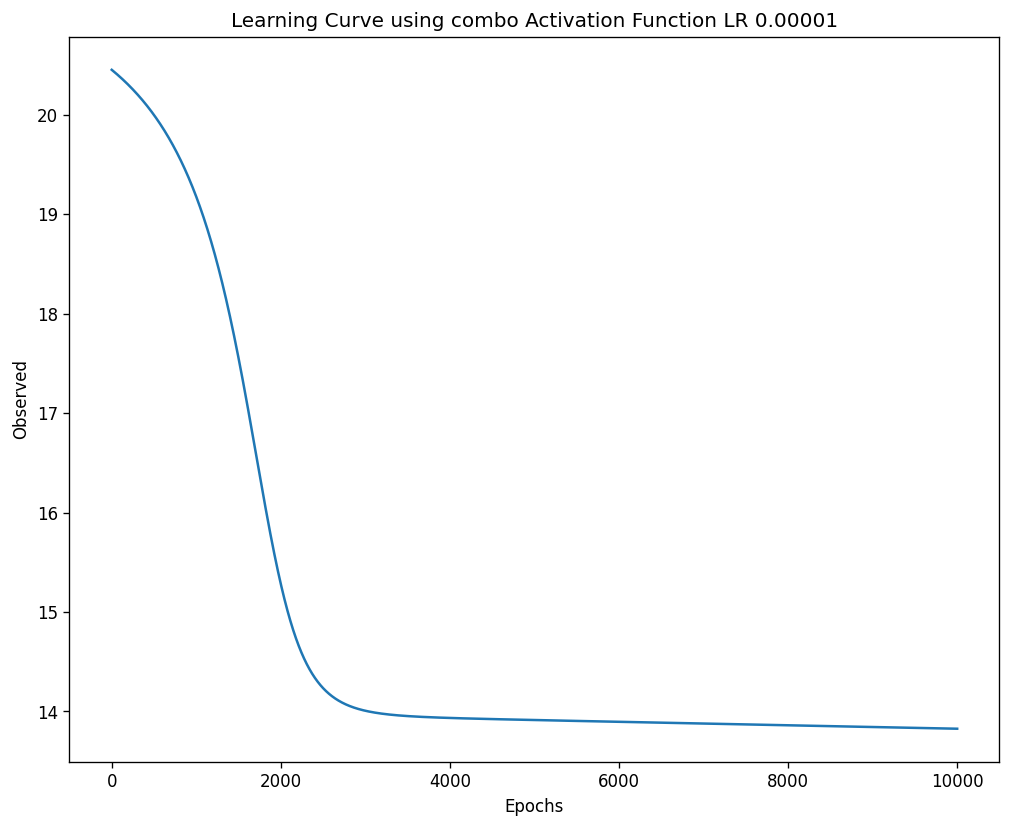

In [37]:
'''
Code to show line graph of the Epochs vs Observed
'''
print('Features : \n', features)
print(' Targets : \n', targets_observed)
print(' Targets predicted : \n', Targets_Predicted)
figure(figsize=(10,8), dpi=120)
plt.plot(losses) #plot losses
plt.xlabel('Epochs')  #add x label name
plt.title('Learning Curve using %s Activation Function LR 0.00001' % select) #set title
plt.ylabel('Observed') #add y label name

plt.savefig('%s_line.png' % select) #save figure
plt.show() #show plot and clear object

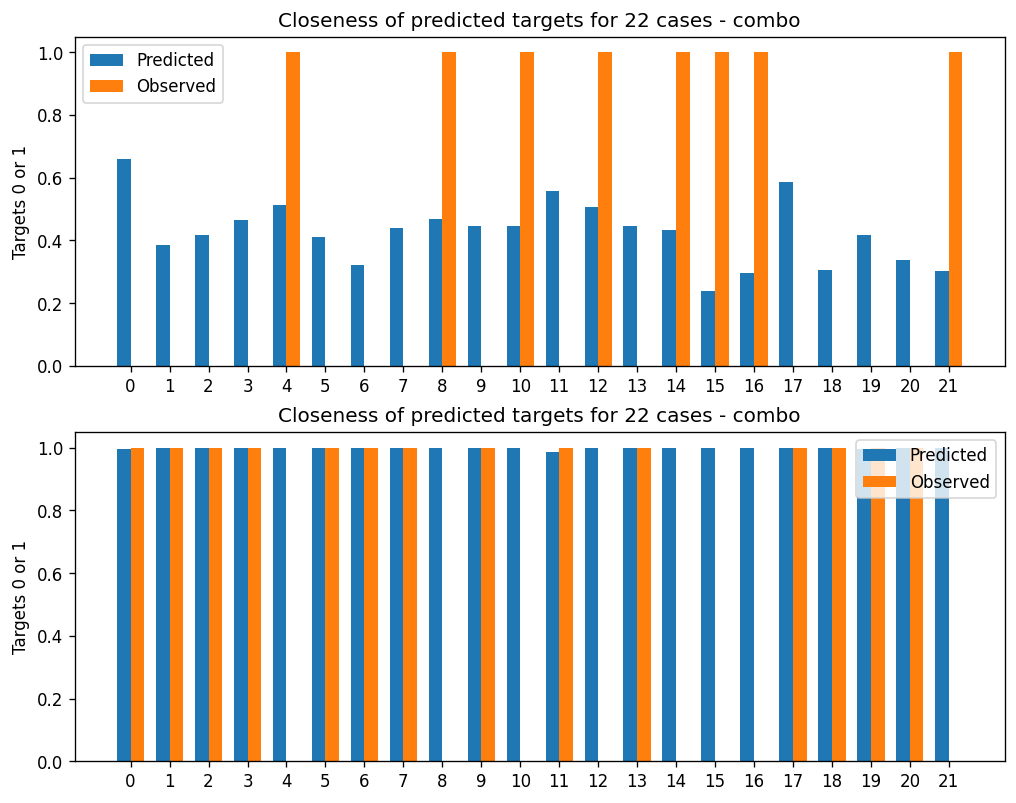

In [38]:
'''
Code to show observed vs predicted
'''
N = 22
target1_predicted = Targets_Predicted[0, ]
target2_predicted = Targets_Predicted[1, :]
target1_observed = targets_observed[0, :]
target2_observed = targets_observed[1, :]

ind = np.arange(N)
width = 0.35

figure(figsize=(10,8), dpi=120) #set fig size and dpi
plt.subplot(2, 1, 1) #create subplot
plt.bar(ind, target1_predicted, width, label='Predicted') #create predicted bar
plt.bar(ind + width, target1_observed, width, label='Observed') #create observed bar
plt.ylabel('Targets 0 or 1') #set y label
plt.title('Closeness of predicted targets for 22 cases - %s' % select) #set title
plt.xticks(ind + width / 2, ind) 
plt.legend(loc='best') #set legend place to best/show legend
plt.subplot(2, 1, 2) #set subplot 2 generation
plt.bar(ind, target2_predicted, width, label='Predicted') #create predicted bar
plt.bar(ind + width, target2_observed, width, label='Observed') #create observed bar
plt.ylabel('Targets 0 or 1') #set y label
plt.title('Closeness of predicted targets for 22 cases - %s' % select) #set title
plt.xticks(ind + width / 2, ind)
plt.legend(loc='best') #set legend place to best/show legend
plt.savefig('%s_observation.png' % select) #save figure
plt.show() #show plot 
